In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [3]:
# Path to your main directory containing rice type folders
data_dir = "C:/Users/SUSHMITHA/Desktop/Breast Ultrasound Images Dataset/Dataset_BUSI_with_GT"

In [5]:
# Image preprocessing parameters
img_height, img_width = 75, 75
batch_size = 32

# Image preprocessing with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1263 images belonging to 3 classes.


In [9]:
# Validation data generator
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 315 images belonging to 3 classes.


In [11]:
# ANN model with Flatten (uses backprop automatically)
model_backprop = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Match output layer to number of classes
])

# Compile the model
model_backprop.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_backprop.summary()

# Train the model
history = model_backprop.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 16875)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,160,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,579 (8.27 MB)

 Trainable params: 2,168,579 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 387ms/step - accuracy: 0.5072 - loss: 1.9223 - val_accuracy: 0.6794 - val_loss: 1.0213
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 349ms/step - accuracy: 0.6366 - loss: 0.8891 - val_accuracy: 0.6730 - val_loss: 0.8255
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 353ms/step - accuracy: 0.6901 - loss: 0.7768 - val_accuracy: 0.7238 - val_loss: 0.8425
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.7720 - loss: 0.6593 - val_accuracy: 0.6603 - val_loss: 0.8194
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 361ms/step - accuracy: 0.7553 - loss: 0.6206 - val_accuracy: 0.7397 - val_loss: 0.8144
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 353ms/step - accuracy: 0.7740 - loss: 0.5779 - val_accuracy: 0.7270 - val_loss: 0.7614
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 359ms/step - accuracy: 0.8243 - loss: 0.4676 - val_accuracy: 0.7048 - val_loss: 0.8590
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 361ms/step - accuracy: 0.8287 - loss: 0.4461 - val_accu

In [15]:
# Evaluate performance
Y_pred = model_backprop.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

# Classification report
target_names = list(val_generator.class_indices.keys())
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step
Confusion Matrix
[[158   9  11]
 [ 44  38   2]
 [ 20   0  33]]
Classification Report
              precision    recall  f1-score   support

      benign       0.71      0.89      0.79       178
   malignant       0.81      0.45      0.58        84
      normal       0.72      0.62      0.67        53

    accuracy                           0.73       315
   macro avg       0.75      0.65      0.68       315
weighted avg       0.74      0.73      0.71       315



<h1>CNN</h1>

CNN stands for Convolutional Neural Network.
It is a deep learning algorithm designed to automatically and efficiently process grid-like data, especially images.

CNNs are used for:

- Image classification
- Object detection
- Facial recognition
- Medical image analysis

How CNNs Work?

1. Input Image: CNN receives an input image which is preprocessed to ensure uniformity in size and format.

2.Convolutional Layers: Filters are applied to the input image to extract features like edges,textures and shapes.

3.Pooling Layers: The feature maps generated by the convolutional layers are downsampled to reduce dimensionality.
    
4. Fully Connected Layers: The downsampled feature maps are passed through fully connected layers to produce the final output, such as a classification label.

5.Output: The CNN outputs a prediction, such as the class of the image.



🧠 Why CNN for Images?
Images have patterns (edges, shapes, textures) and spatial hierarchies. CNNs learn these patterns using filters (kernels) instead of manually extracting features.


✅ Summary Flow of CNN:

Input Image
   ↓

Convolution Layer → Activation (ReLU)
   ↓

Pooling Layer
   ↓

Repeat Convolution + Pooling (deeper layers)
   ↓

Flatten
   ↓

Fully Connected Layer
   ↓

Output (e.g., label: Cat, Dog, etc.)


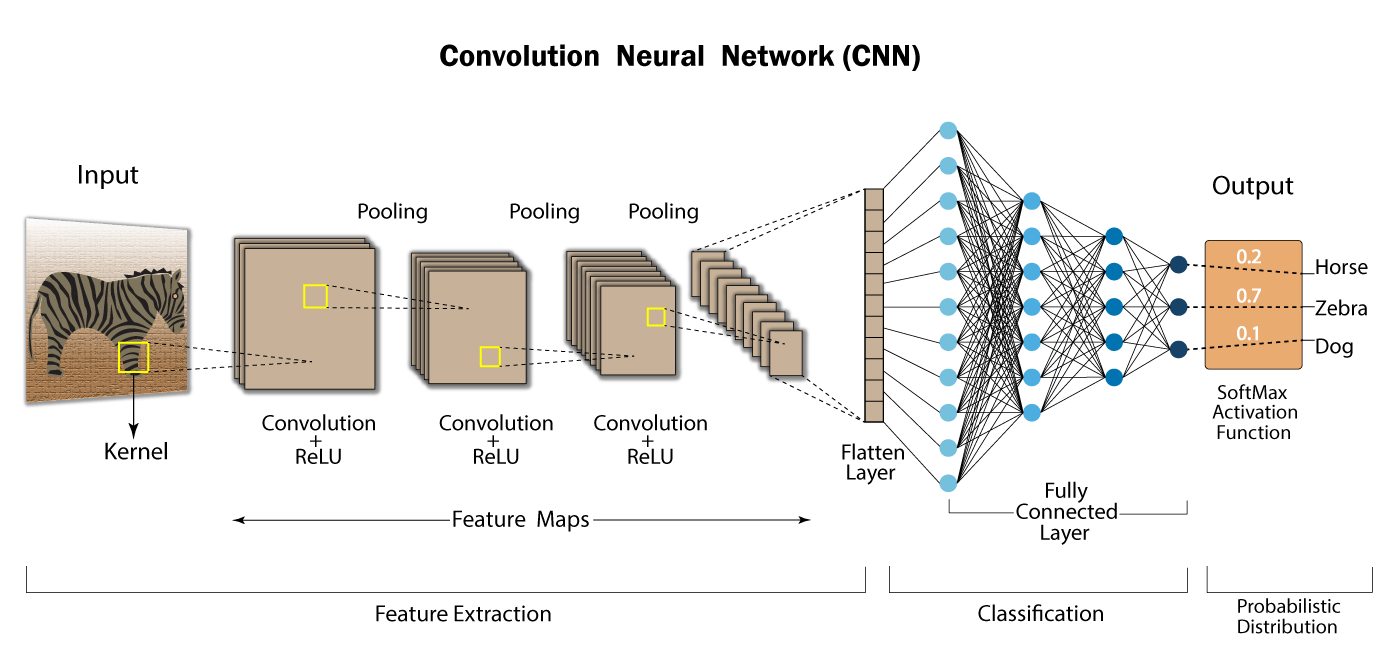

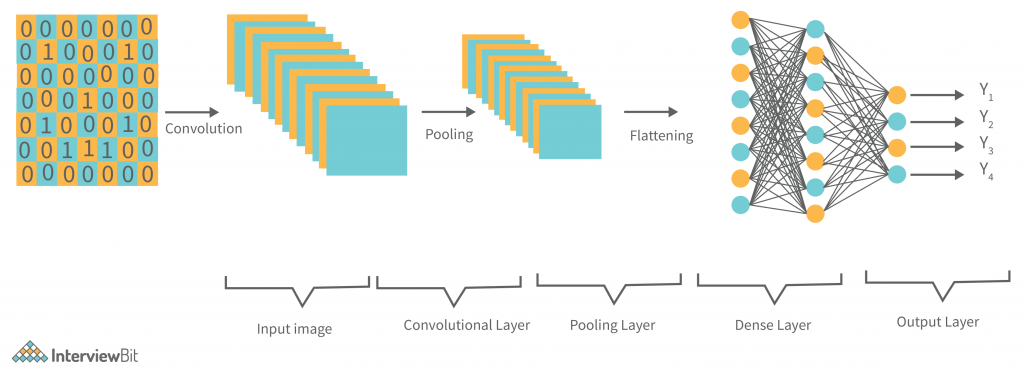

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Path to your main directory containing rice type folders
data_dir = "C:/Users/SUSHMITHA/Desktop/Breast Ultrasound Images Dataset/Dataset_BUSI_with_GT"

In [32]:
# Image preprocessing
img_height, img_width = 75, 75
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [34]:
train_generator = datagen.flow_from_directory(
    data_dir, # Location of dataset 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1263 images belonging to 3 classes.


In [36]:
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 315 images belonging to 3 classes.


In [38]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,387,395 (9.11 MB)

 Trainable params: 2,387,395 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    train_generator,
    epochs=35,
    validation_data=val_generator
)

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.5085 - loss: 1.0113 - val_accuracy: 0.6762 - val_loss: 0.8097
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.6851 - loss: 0.7328 - val_accuracy: 0.6476 - val_loss: 0.8247
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 365ms/step - accuracy: 0.7426 - loss: 0.5754 - val_accuracy: 0.7270 - val_loss: 0.6939
Epoch 4/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step - accuracy: 0.7874 - loss: 0.4834 - val_accuracy: 0.7079 - val_loss: 0.7183
Epoch 5/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 378ms/step - accuracy: 0.8489 - loss: 0.4255 - val_accuracy: 0.7524 - val_loss: 0.7449
Epoch 6/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 381ms/step - accuracy: 0.8741 - loss: 0.3252 - val_accuracy: 0.7619 - val_loss: 0.7846
Epoch 7/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 376ms/step - accuracy: 0.9076 - loss: 0.2453 - val_accuracy: 0.7333 - val_loss: 0.9096
Epoch 8/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 379ms/step - accuracy: 0.9284 - loss: 0.1926 - val_accu

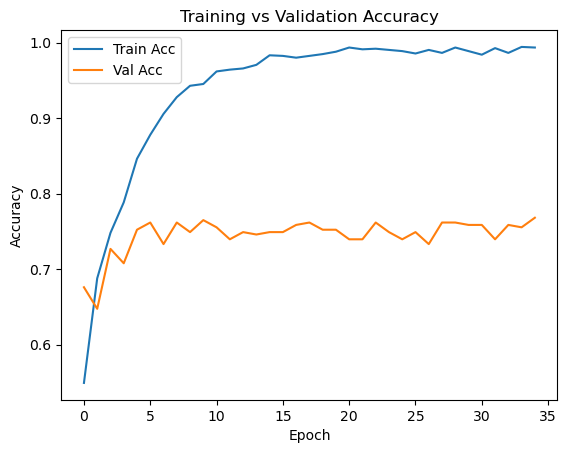

In [50]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [52]:
# Confusion matrix
import numpy as np
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step
Confusion Matrix
[[162  15   1]
 [ 41  43   0]
 [ 11   5  37]]


In [54]:
# Classification report
target_names = list(val_generator.class_indices.keys())
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.76      0.91      0.83       178
   malignant       0.68      0.51      0.59        84
      normal       0.97      0.70      0.81        53

    accuracy                           0.77       315
   macro avg       0.80      0.71      0.74       315
weighted avg       0.77      0.77      0.76       315

